# Price Optimization for Hotels

In [1]:
pip install --upgrade pip

     |████████████████████████████████| 1.8MB 3.3MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Getting snowflake related packages installed and imported

In [2]:
pip install "snowflake-connector-python[pandas]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.4/164.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.7/444.7 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 314.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 110.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 270.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 187.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 256.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 331.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 271.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fosforio 1.0.1 requires pandas==2.0.0, but you have pandas 2.0.3 which is incompatible.
mlflow 2.10.0 requires packaging<24, but you have packaging 24.1 which is incompatible.
mlflow 2.10.0 requires pyarrow<16,>=4.0.0, but you have pyarrow 16.1.0 which is incompatible.
mlflow 2.10.0 requires pytz<2024, but you have pytz 2024.1 which is incompatible.
refractio 2.1.5.4 requires pandas==2.0.0, but you have pandas 2.0.3 which is incompatible.
jupyterlab 3.2.4 requires jupyter-server~=1.4, but you have jupyter-server 2.0.0a1 which is incompatible.
jupyterlab-server 2.25.4 requires jsonschema>=4.18.0, but you have jsonschema 3.2.0 which is incompatible.
mosaic-ai-client 1.0.0 requires matplotlib==3.1.1, but you have matplotlib 3.7.5 which is incompatible.
mosaic-ai-serving 1.0.0 requires Flask==2.1.1; python_version >= 

In [3]:
pip install --upgrade --q snowflake-snowpark-python==1.9.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlflow 2.10.0 requires packaging<24, but you have packaging 24.1 which is incompatible.
mlflow 2.10.0 requires pytz<2024, but you have pytz 2024.1 which is incompatible.
jupyterlab 3.2.4 requires jupyter-server~=1.4, but you have jupyter-server 2.0.0a1 which is incompatible.
jupyterlab-server 2.25.4 requires jsonschema>=4.18.0, but you have jsonschema 3.2.0 which is incompatible.
mosaic-ai-client 1.0.0 requires matplotlib==3.1.1, but you have matplotlib 3.7.5 which is incompatible.
mosaic-ai-serving 1.0.0 requires Flask==2.1.1; python_version >= "3.7", but you have flask 2.3.3 which is incompatible.
mosaic-ai-serving 1.0.0 requires itsdangerous==2.0.1, but you have itsdangerous 2.2.0 which is incompatible.
mosaic-ai-serving 1.0.0 requires Jinja2==3.0.3, but you have jinja2 3.1.4 which is incompatible.
mosaic-ai-se

In [4]:
pip install fosforio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 197.1 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 158.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 332.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 356.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 321.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlflow 2.10.0 requires pytz<2024, but you have pytz 2024.1 which is incompatible.
snowflake-connector-python 3.11.0 requires urllib3<2.0.0,>=1.21.1; python_version < "3.10", but you have urllib3 2.2.1 which is incompatible.
snowflake-snowpark-python 1.9.0 requires cloudpickle<=2.0.0,>=1.6.0; python_version < "3.11", but you have cloudpickle 2.2.1 which is incompatible.
jupyterlab 3.2.4 requires jupyter-

In [5]:
pip install fosforml

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 209.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 216.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 736.6/736.6 kB 335.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 235.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 286.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 277.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 211.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 265.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 227.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.4/164.4 kB 309.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 25

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 230.5 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fosforml 1.0.1 requires cloudpickle==3.0.0, but you have cloudpickle 2.2.1 which is incompatible.
mosaic-utils 1.0.2 requires scikit-learn==1.2.1; python_version >= "3.8", but you have scikit-learn 1.3.2 which is incompatible.
mosaic-ai-client 1.0.0 requires matplotlib==3.1.1, but you have matplotlib 3.7.5 which is incompatible.
mosaic-ai-client 1.0.0 requires requests-toolbelt==0.9.1, but you have requests-toolbelt 1.0.0 which is incompatible.
mosaic-ai-serving 1.0.0 requires Flask==2.1.1; python_version >= "3.7", but you have flask 2.3.3 which is incompatible.
mosaic-ai-serving 1.0.0 requires itsdangerous==2.0.1, but you have itsdangerous 2.2.0 which is incompatible.
mosaic-ai-serving 1.0.0 requires Jinja2==3.0.3, but you ha

In [7]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 195.1 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 159.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 329.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 352.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 342.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fosforio 1.0.1 requires pandas==2.0.0, but you have pandas 2.0.3 which is incompatible.
mlflow 2.10.0 requires pytz<2024, but you have pytz 2024.1 which is incompatible.
refractio 2.1.5.4 requires pandas==2.0.0, but you have pandas 2.0.3 which is incompatible.
fosforml 1.0.1 requires cloudpickle==3.0.0, but you have cloudpickle 2.2.1 which is incompatible.
mosaic-utils 1.0.2 requires scikit-learn==1.2.1

In [8]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 109.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 322.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 239.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 303.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 166.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 223.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 230.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 292.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 292.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlflow 2.10.

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 130.5 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 323.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 217.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 220.1 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fosforml 1.0.1 requires cloudpickle==3.0.0, but you have cloudpickle 2.2.1 which is incompatible.
mosaic-utils 1.0.2 requires scikit-learn==1.2.1; python_version >= "3.8", but you have scikit-learn 1.3.2 which is incompatible.
mosaic-ai-client 1.0.0 requires matplotlib==3.1.1, but you have matplotlib 3.7.5 which is incompatible.
mosaic-ai-client 1.0.0 requires requests-toolbelt==0.9.1, but you ha

In [10]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 209.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 164.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 208.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 211.5 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fosforml 1.0.1 requires cloudpickle==3.0.0, but you have cloudpickle 2.2.1 which is incompatible.
mosaic-utils 1.0.2 requires scikit-learn==1.2.1; python_version >= "3.8", but you have scikit-learn 1.3.2 which is incompatible.
mosaic-ai-client 1.0.0 requires matplotlib==3.1.1, but you have matplotlib 3.7.5 which is incompatible.
mosaic-ai-client 1.0.0 requires requests-toolbelt==0.9.

In [11]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 144.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 200.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 182.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 324.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 252.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 340.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 233.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 213.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 261.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 316.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install python-dateutil

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 5.6 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 3.2.4 requires jupyter-server~=1.4, but you have jupyter-server 2.0.0a1 which is incompatible.
jupyterlab-server 2.25.4 requires jsonschema>=4.18.0, but you have jsonschema 3.2.0 which is incompatible.
mosaic-ai-client 1.0.0 requires matplotlib==3.1.1, but you have matplotlib 3.7.5 which is incompatible.
mosaic-ai-client 1.0.0 requires requests-toolbelt==0.9.1, but you have requests-toolbelt 1.0.0 which is incompatible.
mosaic-ai-serving 1.0.0 requires Flask==2.1.1; python_version >= "3.7", but you have flask 2.3.3 which is incompatible.
mosaic-ai-serving 1.0.0 requires itsdangerous==2.0.1, but you have itsdangerous 2.2.0 which is incompatible.
mosaic-ai-serving 1.0.0 requires Jinja2==3.0.3, but you have jinja2 3.1.

In [13]:
pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Restart kernal and continue

# Importing packages

In [1]:
from snowflake.snowpark import Session

In [2]:
from snowflake.connector.pandas_tools import write_pandas

In [3]:
from fosforio import snowflake

Connection manager service url initialised to http://fdc-project-manager:80/project-manager
If you need to update its value then update the variable CONNECTION_MANAGER_BASE_URL in os env.


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
import pandas as pd

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 500)
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error

Matplotlib created a temporary cache directory at /tmp/matplotlib-i8zsqj02 because the default path (/home/mosaic-ai/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [7]:
from joblib import dump, load
import requests
from tqdm import tqdm
import time
from time import sleep
import configparser
from dateutil.relativedelta import relativedelta
import datetime

# Getting data from snowflake

In [8]:
# To get snowflake connection object with a default snowflake connection created by the user, if available.
snowflake.get_connection("TTH_REV_OPT_CXN")

Connection object created: <snowflake.connector.connection.SnowflakeConnection object at 0x7fcbbb674e50>
Please close the connection after use!


In [9]:
df = snowflake.get_dataframe("BOOKINGS_TRANSFORMED")
df['ADR']= round(df['ADR'])

In [ ]:
#download star schema tables
meal = 
customer = 
channel = 
room = 

In [10]:
df.shape

(109711, 34)

In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109711 entries, 0 to 109710
Data columns (total 34 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ARRIVAL_DATE_TRANSFORMED             109711 non-null  object 
 1   RESERVATION_STATUS_DATE_TRANSFORMED  109711 non-null  object 
 2   HOTEL                                109711 non-null  object 
 3   IS_CANCELED                          109711 non-null  int8   
 4   LEAD_TIME                            109711 non-null  int16  
 5   ARRIVAL_DATE_YEAR                    109711 non-null  int16  
 6   MONTH                                109711 non-null  int8   
 7   ARRIVAL_DATE_WEEK_NUMBER             109711 non-null  int8   
 8   ARRIVAL_DATE_DAY_OF_MONTH            109711 non-null  int8   
 9   EXPECTED_ARRIVAL_DATE                109711 non-null  object 
 10  RESERVATION_STATUS                   109711 non-null  object 
 11  RESERVATION_S

In [12]:
df.columns = [x.lower() for x in df.columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109711 entries, 0 to 109710
Data columns (total 34 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   arrival_date_transformed             109711 non-null  object 
 1   reservation_status_date_transformed  109711 non-null  object 
 2   hotel                                109711 non-null  object 
 3   is_canceled                          109711 non-null  int8   
 4   lead_time                            109711 non-null  int16  
 5   arrival_date_year                    109711 non-null  int16  
 6   month                                109711 non-null  int8   
 7   arrival_date_week_number             109711 non-null  int8   
 8   arrival_date_day_of_month            109711 non-null  int8   
 9   expected_arrival_date                109711 non-null  object 
 10  reservation_status                   109711 non-null  object 
 11  reservation_s

<Axes: xlabel='reserved_room_type', ylabel='adr'>

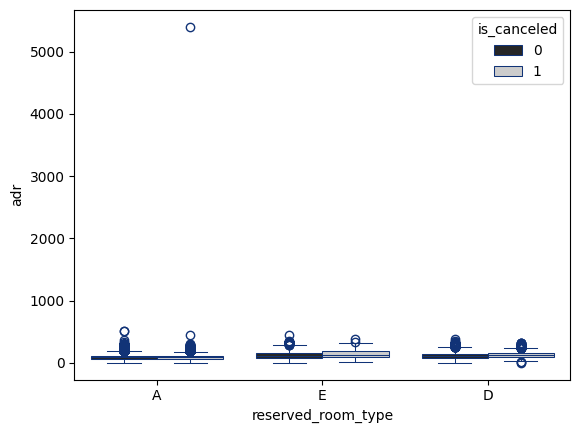

In [14]:
sns.boxplot(data=df, x="reserved_room_type", y="adr", hue= 'is_canceled', color=".8", linecolor="#137", linewidth=.75)

In [15]:
quartiles_data = df.groupby(['hotel', 'reserved_room_type'])['adr'].agg(
    adr_mean='mean',
    adr_median='median',
    adr_q01=lambda x: x.quantile(0.10),
    adr_q1=lambda x: x.quantile(0.25),
    adr_q2=lambda x: x.quantile(0.50),
    adr_q3=lambda x: x.quantile(0.75),
    adr_q4=lambda x: x.quantile(1.00)
).reset_index()
print(quartiles_data)

          hotel reserved_room_type    adr_mean  adr_median  adr_q01  adr_q1  \
0    City Hotel                  A   97.675707        94.0     63.0    75.0   
1    City Hotel                  D  132.795218       132.0     91.0   109.0   
2    City Hotel                  E  162.017403       162.0    108.0   130.0   
3  Resort Hotel                  A   77.916806        63.0     35.0    44.0   
4  Resort Hotel                  D  104.868097        84.0     51.0    63.0   
5  Resort Hotel                  E  116.111474        99.0     58.0    72.0   

   adr_q2  adr_q3  adr_q4  
0    94.0   115.0  5400.0  
1   132.0   154.0   376.0  
2   162.0   190.0   452.0  
3    63.0    92.0   508.0  
4    84.0   135.0   351.0  
5    99.0   149.0   382.0  


In [16]:
# Merge the quartiles data with the original data
merged_data = pd.merge(df, quartiles_data, on=['hotel', 'reserved_room_type'])

print("\nMerged Data:")
print(merged_data)


Merged Data:
       arrival_date_transformed reservation_status_date_transformed  \
0                    2021-07-16                          2020-10-17   
1                    2021-08-20                          2020-10-17   
2                    2021-07-02                          2020-10-17   
3                    2021-08-20                          2020-10-17   
4                    2021-07-23                          2020-10-17   
...                         ...                                 ...   
109706               2023-08-31                          2023-09-03   
109707               2023-08-31                          2023-09-03   
109708               2023-08-31                          2023-09-03   
109709               2023-08-29                          2023-09-04   
109710               2023-08-31                          2023-09-07   

             hotel  is_canceled  lead_time  arrival_date_year  month  \
0       City Hotel            1        272               2021

In [17]:
filtered_data = merged_data[(merged_data['adr'] > merged_data['adr_q01']) & 
                            (merged_data['adr'] < merged_data['adr_q4'])]

print("\nFiltered Data:")
print(filtered_data)


Filtered Data:
       arrival_date_transformed reservation_status_date_transformed  \
940                  2021-07-04                          2021-01-20   
941                  2021-07-04                          2021-01-20   
982                  2021-07-15                          2021-02-17   
983                  2021-07-15                          2021-02-17   
984                  2021-09-11                          2021-02-20   
...                         ...                                 ...   
109706               2023-08-31                          2023-09-03   
109707               2023-08-31                          2023-09-03   
109708               2023-08-31                          2023-09-03   
109709               2023-08-29                          2023-09-04   
109710               2023-08-31                          2023-09-07   

             hotel  is_canceled  lead_time  arrival_date_year  month  \
940     City Hotel            1        184               20

In [18]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97963 entries, 940 to 109710
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   arrival_date_transformed             97963 non-null  object 
 1   reservation_status_date_transformed  97963 non-null  object 
 2   hotel                                97963 non-null  object 
 3   is_canceled                          97963 non-null  int8   
 4   lead_time                            97963 non-null  int16  
 5   arrival_date_year                    97963 non-null  int16  
 6   month                                97963 non-null  int8   
 7   arrival_date_week_number             97963 non-null  int8   
 8   arrival_date_day_of_month            97963 non-null  int8   
 9   expected_arrival_date                97963 non-null  object 
 10  reservation_status                   97963 non-null  object 
 11  reservation_status_date       

In [21]:
# renaming some column names
filtered_data.rename(columns = {'arrival_date_transformed':'arrival_date', 
                                'reservation_status_date_transformed':'reservation_date',
                                'arrival_date_year':'year','arrival_date_week_number': 'week', 'arrival_date_day_of_month': 'dom', 
                                'total_stay_nights': 'total_rns',
                                'stays_in_weekend_nights':'weekend_nights', 'stays_in_week_nights': 'week_nights',
                                'reserved_room_type': 'room_type', 'customer_type':'cust_type', 'ADR':'adr'}, inplace = True)


In [22]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97963 entries, 940 to 109710
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   arrival_date                    97963 non-null  object 
 1   reservation_date                97963 non-null  object 
 2   hotel                           97963 non-null  object 
 3   is_canceled                     97963 non-null  int8   
 4   lead_time                       97963 non-null  int16  
 5   year                            97963 non-null  int16  
 6   month                           97963 non-null  int8   
 7   week                            97963 non-null  int8   
 8   dom                             97963 non-null  int8   
 9   expected_arrival_date           97963 non-null  object 
 10  reservation_status              97963 non-null  object 
 11  reservation_status_date         97963 non-null  object 
 12  total_rns                       97

<Axes: xlabel='room_type', ylabel='adr'>

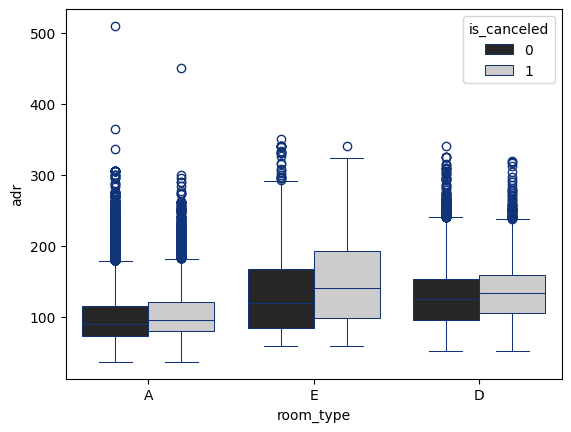

In [23]:
sns.boxplot(data=filtered_data, x="room_type", y="adr", hue= 'is_canceled', color=".8", linecolor="#137", linewidth=.75)

<Axes: xlabel='room_type', ylabel='adr'>

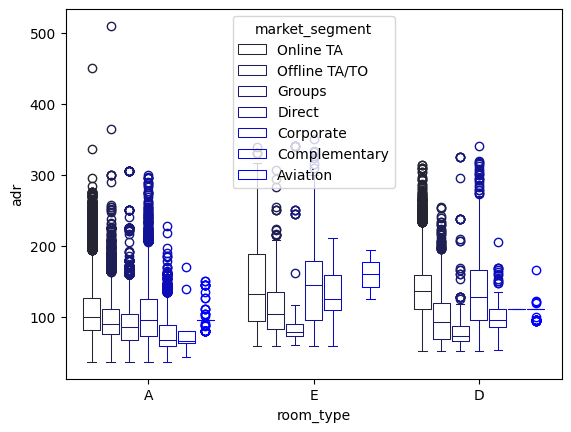

In [24]:
sns.boxplot(data=filtered_data, x="room_type", y="adr", hue= 'market_segment', 
            fill=False, gap=.1, linecolor="#137", linewidth=.75, color= 'b')

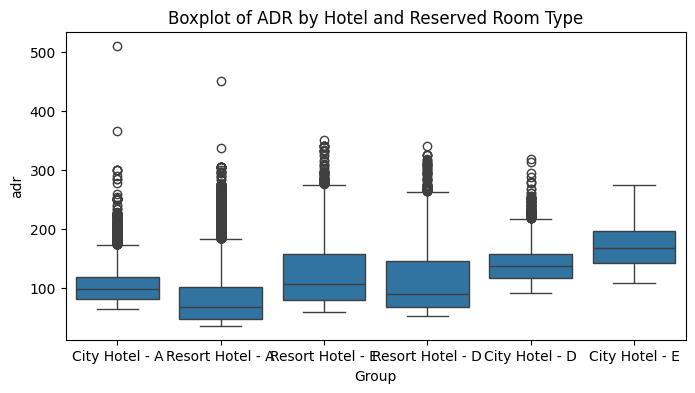

In [25]:
# Create a combined column for the plot
filtered_data['Group'] = filtered_data['hotel'] + ' - ' + filtered_data['room_type']

# Set the size of the plot
plt.figure(figsize=(8, 4))

# Create boxplot
sns.boxplot(x='Group', y='adr', data=filtered_data)

# Customize the plot
plt.title('Boxplot of ADR by Hotel and Reserved Room Type')
plt.xlabel('Group')
plt.ylabel('adr')

# Show plot
plt.show()


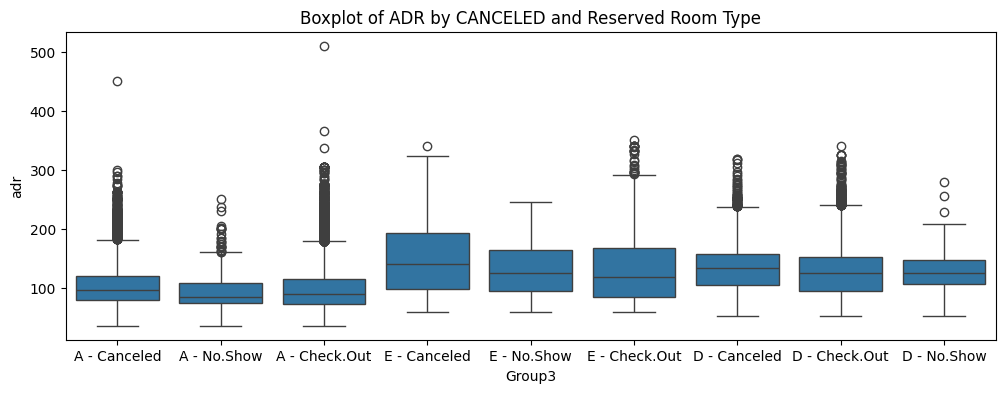

In [26]:
# Create a combined column for the plot
filtered_data['Group3'] = filtered_data['room_type'] + ' - ' + filtered_data['reservation_status']

# Set the size of the plot
plt.figure(figsize=(12, 4))

# Create boxplot
sns.boxplot(x='Group3', y='adr', data=filtered_data)

# Customize the plot
plt.title('Boxplot of ADR by CANCELED and Reserved Room Type')
plt.xlabel('Group3')
plt.ylabel('adr')

# Show plot
plt.show()

# EDA

In [27]:
# Removing cancelled transactions to model based on transactions that customers preferred to actually complete
df0 = filtered_data[(filtered_data['is_canceled'] == 0) & (filtered_data['reservation_status'] !='No-Show')] 
df0

,arrival_date,reservation_date,hotel,is_canceled,lead_time,year,month,week,dom,expected_arrival_date,reservation_status,reservation_status_date,total_rns,tally_days,weekend_nights,week_nights,adults,children,babies,total_guests,avg_rooms_per_night,total_room_nights,meal,country,market_segment,distribution_channel,previous_cancellations,previous_bookings_not_canceled,room_type,assigned_room_type,deposit_type,days_in_waiting_list,cust_type,adr,adr_mean,adr_median,adr_q01,adr_q1,adr_q2,adr_q3,adr_q4,Group,Group3
1959,2021-07-01,2021-07-03,City Hotel,0,257,2021,7,27,1,01-07-2021,Check.Out,03-07-2021,2,2.0,0,2,1,0,0,1,1,2,HB,PRT,Offline TA/TO,TA/TO,0,0,A,A,No Deposit,0,Transient,80.0,97.675707,94.0,63.0,75.0,94.0,115.0,5400.0,City Hotel - A,A - Check.Out
1961,2021-07-01,2021-07-03,City Hotel,0,257,2021,7,27,1,01-07-2021,Check.Out,03-07-2021,2,2.0,0,2,2,0,0,2,1,2,HB,PRT,Offline TA/TO,TA/TO,0,0,A,A,No Deposit,0,Transient,102.0,97.675707,94.0,63.0,75.0,94.0,115.0,5400.0,City Hotel - A,A - Check.Out
1965,2021-07-01,2021-07-03,City Hotel,0,257,2021,7,27,1,01-07-2021,Check.Out,03-07-2021,2,2.0,0,2,2,0,0,2,1,2,HB,PRT,Offline TA/TO,TA/TO,0,0,A,A,No Deposit,0,Transient,102.0,97.675707,94.0,63.0,75.0,94.0,115.0,5400.0,City Hotel - A,A - Check.Out
1967,2021-07-01,2021-07-03,City Hotel,0,257,2021,7,27,1,01-07-2021,Check.Out,03-07-2021,2,2.0,0,2,2,0,0,2,1,2,HB,PRT,Offline TA/TO,TA/TO,0,0,A,A,No Deposit,0,Transient,102.0,97.675707,94.0,63.0,75.0,94.0,115.0,5400.0,City Hotel - A,A - Check.Out
1970,2021-07-01,2021-07-03,City Hotel,0,257,2021,7,27,1,01-07-2021,Check.Out,03-07-2021,2,2.0,0,2,2,0,0,2,1,2,HB,PRT,Offline TA/TO,TA/TO,0,0,A,A,No Deposit,0,Transient,102.0,97.675707,94.0,63.0,75.0,94.0,115.0,5400.0,City Hotel - A,A - Check.Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109706,2023-08-31,2023-09-03,City Hotel,0,230,2023,8,35,31,31-08-2023,Check.Out,03-09-2023,3,3.0,0,3,2,0,0,2,1,3,BB,GBR,Offline TA/TO,TA/TO,0,0,E,E,No Deposit,0,Transient,110.0,162.017403,162.0,108.0,130.0,162.0,190.0,452.0,City Hotel - E,E - Check.Out
109707,2023-08-31,2023-09-03,City Hotel,0,230,2023,8,35,31,31-08-2023,Check.Out,03-09-2023,3,3.0,0,3,2,0,0,2,1,3,BB,GBR,Offline TA/TO,TA/TO,0,0,E,E,No Deposit,0,Transient,110.0,162.017403,162.0,108.0,130.0,162.0,190.0,452.0,City Hotel - E,E - Check.Out
109708,2023-08-31,2023-09-03,City Hotel,0,1,2023,8,35,31,31-08-2023,Check.Out,03-09-2023,3,3.0,0,3,2,0,0,2,1,3,BB,GBR,Offline TA/TO,TA/TO,0,0,E,E,No Deposit,0,Transient,110.0,162.017403,162.0,108.0,130.0,162.0,190.0,452.0,City Hotel - E,E - Check.Out
109709,2023-08-29,2023-09-04,City Hotel,0,165,2023,8,35,29,29-08-2023,Check.Out,04-09-2023,6,6.0,1,5,3,0,0,3,1,6,BB,AUT,Online TA,TA/TO,0,0,E,E,No Deposit,0,Transient,209.0,162.017403,162.0,108.0,130.0,162.0,190.0,452.0,City Hotel - E,E - Check.Out


In [28]:
#Understanding what market segments need to be considered
df0.groupby(['hotel','room_type','market_segment']).agg({'adr':'mean','reservation_date':'count'})

adr  reservation_date
hotel        room_type market_segment                              
City Hotel   A         Aviation         96.505155                97
                       Complementary    90.250000                 8
                       Corporate        81.341182              1996
                       Direct          108.769429              3101
                       Groups           94.079414              3274
                       Offline TA/TO    93.874748              7928
                       Online TA       108.181146             15965
             D         Aviation        107.716049                81
                       Corporate       110.408163                98
                       Direct          138.677340               812
                       Groups          137.750000                16
                       Offline TA/TO   116.143322               307
                       Online TA       140.580328              5185
             E         Aviation        159.500000                 2
                       Corporate       135.575000                40
                       Direct          170.294906               373
                       Offline TA/TO   145.553571                56
                       Online TA       172.950739               406
Resort Hotel A         Complementary    53.250000                 4
                       Corporate        57.724481              1205
                       Direct           87.046678              2378
                       Groups           69.130259              2472
                       Offline TA/TO    74.261712              2839
                       Online TA        93.493436              5713
             D         Complementary   110.000000                 1
                       Corporate        76.500000                32
                       Direct          124.118721               876
                       Groups           80.310448               335
                       Offline TA/TO    93.077905              1489
                       Online TA       121.589731              1967
             E         Corporate        99.923077                13
                       Direct          125.155525               733
                       Groups           93.623656               186
                       Offline TA/TO   106.664484               611
                       Online TA       125.332677              1524

#We will filter for room _types A,D,E and will filter OUT "Complementary" market_segment. retain both City and resort hotel types.
##"For our pricing model, we need to count the frequency of each price point

##Moreover, Hotels have different room types with different prices. To create our pricing model, we need to optimize the room type level. We are interested in the room type reserved as this captures the price the guest was willing to pay for that room type. It is common for hotels to overbook the lower room types and give free upgrades to higher room types. Therefore, any pricing analysis must be done at the reserved room type and not the stayed room type.

##Unfortunately, there is not much description of the reserved room type, but by looking at the price points, we can infer that A &B are the lowest price points. The rest of the room types command a higher ADR, which means they likely are upgraded rooms. In another workbook, we will explore how to price those premium rooms, but for the moment, let's focus on room types A & D, E.

#filter data to only Direct and Online TA and room typ A&B
##Create individual datasets for City, Resort, room types: A,D,E

In [36]:
#data1 = df0[(df0['market_segment'] != 'Complementary') & (df0['market_segment'] != 'Corporate') 
#           & (df0['market_segment'] !='Aviation')]
data1 = df0.loc[~df0['market_segment'].isin(['Complementary', 'Corporate', 'Aviation'])]
data1 = df0[(df0['room_type'] == 'A') |(df0['room_type'] == 'D') | (df0['room_type'] == 'E')]
data1.room_type.value_counts()

room_type
A    46980
D    11199
E     3944
Name: count, dtype: int64

In [37]:
data.market_segment.value_counts()

market_segment
Online TA        30760
Offline TA/TO    13230
Direct            8273
Groups            6283
Corporate         3384
Aviation           180
Complementary       13
Name: count, dtype: int64

In [38]:
#Understanding what market segments need to be considered
data1.groupby(['hotel','room_type','market_segment']).agg({'adr':'mean','reservation_date':'count'})

adr  reservation_date
hotel        room_type market_segment                              
City Hotel   A         Aviation         96.505155                97
                       Complementary    90.250000                 8
                       Corporate        81.341182              1996
                       Direct          108.769429              3101
                       Groups           94.079414              3274
                       Offline TA/TO    93.874748              7928
                       Online TA       108.181146             15965
             D         Aviation        107.716049                81
                       Corporate       110.408163                98
                       Direct          138.677340               812
                       Groups          137.750000                16
                       Offline TA/TO   116.143322               307
                       Online TA       140.580328              5185
             E         Aviation        159.500000                 2
                       Corporate       135.575000                40
                       Direct          170.294906               373
                       Offline TA/TO   145.553571                56
                       Online TA       172.950739               406
Resort Hotel A         Complementary    53.250000                 4
                       Corporate        57.724481              1205
                       Direct           87.046678              2378
                       Groups           69.130259              2472
                       Offline TA/TO    74.261712              2839
                       Online TA        93.493436              5713
             D         Complementary   110.000000                 1
                       Corporate        76.500000                32
                       Direct          124.118721               876
                       Groups           80.310448               335
                       Offline TA/TO    93.077905              1489
                       Online TA       121.589731              1967
             E         Corporate        99.923077                13
                       Direct          125.155525               733
                       Groups           93.623656               186
                       Offline TA/TO   106.664484               611
                       Online TA       125.332677              1524

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62123 entries, 1959 to 109710
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   arrival_date                    62123 non-null  object 
 1   reservation_date                62123 non-null  object 
 2   hotel                           62123 non-null  object 
 3   is_canceled                     62123 non-null  int8   
 4   lead_time                       62123 non-null  int16  
 5   year                            62123 non-null  int16  
 6   month                           62123 non-null  int8   
 7   week                            62123 non-null  int8   
 8   dom                             62123 non-null  int8   
 9   expected_arrival_date           62123 non-null  object 
 10  reservation_status              62123 non-null  object 
 11  reservation_status_date         62123 non-null  object 
 12  total_rns                       6

In [41]:
# checking num dates
data1.groupby(['arrival_date']).agg({'adr':'mean','reservation_date':'count'})

,adr,reservation_date
arrival_date,,
2021-07-01,95.150538,93
2021-07-02,93.464286,28
2021-07-03,99.428571,28
2021-07-04,95.352941,34
2021-07-05,95.000000,30
...,...,...
2023-08-27,132.650943,106
2023-08-28,134.540741,135
2023-08-29,134.644737,76


In [42]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62123 entries, 1959 to 109710
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   arrival_date                    62123 non-null  object 
 1   reservation_date                62123 non-null  object 
 2   hotel                           62123 non-null  object 
 3   is_canceled                     62123 non-null  int8   
 4   lead_time                       62123 non-null  int16  
 5   year                            62123 non-null  int16  
 6   month                           62123 non-null  int8   
 7   week                            62123 non-null  int8   
 8   dom                             62123 non-null  int8   
 9   expected_arrival_date           62123 non-null  object 
 10  reservation_status              62123 non-null  object 
 11  reservation_status_date         62123 non-null  object 
 12  total_rns                       6

In [44]:
data1.head(2)

,arrival_date,reservation_date,hotel,is_canceled,lead_time,year,month,week,dom,expected_arrival_date,reservation_status,reservation_status_date,total_rns,tally_days,weekend_nights,week_nights,adults,children,babies,total_guests,avg_rooms_per_night,total_room_nights,meal,country,market_segment,distribution_channel,previous_cancellations,previous_bookings_not_canceled,room_type,assigned_room_type,deposit_type,days_in_waiting_list,cust_type,adr,adr_mean,adr_median,adr_q01,adr_q1,adr_q2,adr_q3,adr_q4,Group,Group3
1959,2021-07-01,2021-07-03,City Hotel,0,257,2021,7,27,1,01-07-2021,Check.Out,03-07-2021,2,2.0,0,2,1,0,0,1,1,2,HB,PRT,Offline TA/TO,TA/TO,0,0,A,A,No Deposit,0,Transient,80.0,97.675707,94.0,63.0,75.0,94.0,115.0,5400.0,City Hotel - A,A - Check.Out
1961,2021-07-01,2021-07-03,City Hotel,0,257,2021,7,27,1,01-07-2021,Check.Out,03-07-2021,2,2.0,0,2,2,0,0,2,1,2,HB,PRT,Offline TA/TO,TA/TO,0,0,A,A,No Deposit,0,Transient,102.0,97.675707,94.0,63.0,75.0,94.0,115.0,5400.0,City Hotel - A,A - Check.Out


In [48]:
# drop unrequired columns
data2 = data1.drop(['tally_days', 'deposit_type', 'assigned_room_type','is_cancelled','adults', 'children', 'babies', 
                   'avg_rooms_per_night',
                   'meal', 'country', 'distribution_channel', 'previous_bookings_not_canceled','deposit_type',
                   'days_in_waiting_list', 'reservation_status_date', 'previous_cancellations','expected_arrival_date',
                   'lead_time','total_room_nights','adr_mean','adr_median','adr_q01','adr_q1' ,'adr_q2','adr_q3','adr_q4',                       
                   'Group','Group3'], axis =1)
data2.info()

KeyError: "['is_cancelled', 'adr_meanadr_median'] not found in axis"

In [90]:
# renaming some column names
## data1.rename(columns = {'ARRIVAL_DATE_TRANSFORMED':'arrival_date', 'RESERVATION_STATUS_DATE_TRANSFORMED':'reservation_date',
                        'HOTEL':'hotel', 'ARRIVAL_DATE_YEAR':'year','MONTH':'month', 
                        'ARRIVAL_DATE_WEEK_NUMBER': 'week', 'ARRIVAL_DATE_DAY_OF_MONTH': 'dom', 
                        'RESERVATION_STATUS': 'reservation_status', 'TOTAL_STAY_NIGHTS': 'total_rns',
                        'STAYS_IN_WEEKEND_NIGHTS':'weekend_nights', 
                        'STAYS_IN_WEEK_NIGHTS': 'week_nights','TOTAL_GUESTS': 'total_guests','MARKET_SEGMENT':'market_segment', 
                        'RESERVED_ROOM_TYPE': 'room_type', 'CUSTOMER_TYPE':'cust_type', 'ADR':'adr'}, inplace = True) ##

In [91]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63856 entries, 2425 to 109710
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arrival_date        63856 non-null  object 
 1   reservation_date    63856 non-null  object 
 2   hotel               63856 non-null  object 
 3   year                63856 non-null  int16  
 4   month               63856 non-null  int8   
 5   week                63856 non-null  int8   
 6   dom                 63856 non-null  int8   
 7   reservation_status  63856 non-null  object 
 8   total_rns           63856 non-null  int8   
 9   weekend_nights      63856 non-null  int8   
 10  week_nights         63856 non-null  int8   
 11  total_guests        63856 non-null  int8   
 12  market_segment      63856 non-null  object 
 13  room_type           63856 non-null  object 
 14  cust_type           63856 non-null  object 
 15  adr                 63856 non-null  float64
dtypes: fl

In [92]:
# checking num dates
data1.groupby(['arrival_date']).agg({'adr':'mean','hotel':'count'})

,adr,hotel
arrival_date,,
2021-07-01,93.366667,90
2021-07-02,92.275862,29
2021-07-03,94.156250,32
2021-07-04,88.857143,42
2021-07-05,95.000000,30
...,...,...
2023-08-27,130.818182,110
2023-08-28,134.835821,134
2023-08-29,141.671642,67


In [93]:
# Creating separate tables for Optimizing models
ca = data1[(data1['hotel'] == 'City Hotel') & (data1['room_type'] == 'A')]
cd = data1[(data1['hotel'] == 'City Hotel') & (data1['room_type'] == 'D')]
ce = data1[(data1['hotel'] == 'City Hotel') & (data1['room_type'] == 'E')]
ra = data1[(data1['hotel'] == 'Resort Hotel') & (data1['room_type'] == 'A')]
rd = data1[(data1['hotel'] == 'Resort Hotel') & (data1['room_type'] == 'D')]
re = data1[(data1['hotel'] == 'Resort Hotel') & (data1['room_type'] == 'E')]

In [94]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32232 entries, 2757 to 109679
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arrival_date        32232 non-null  object 
 1   reservation_date    32232 non-null  object 
 2   hotel               32232 non-null  object 
 3   year                32232 non-null  int16  
 4   month               32232 non-null  int8   
 5   week                32232 non-null  int8   
 6   dom                 32232 non-null  int8   
 7   reservation_status  32232 non-null  object 
 8   total_rns           32232 non-null  int8   
 9   weekend_nights      32232 non-null  int8   
 10  week_nights         32232 non-null  int8   
 11  total_guests        32232 non-null  int8   
 12  market_segment      32232 non-null  object 
 13  room_type           32232 non-null  object 
 14  cust_type           32232 non-null  object 
 15  adr                 32232 non-null  float64
dtypes: fl

In [95]:
# checking num dates
ca.groupby(['arrival_date']).agg({'adr':'mean','hotel':'count'})

,adr,hotel
arrival_date,,
2021-07-01,96.937500,64
2021-07-02,59.000000,1
2021-07-03,74.500000,10
2021-07-04,63.777778,9
2021-07-06,66.000000,1
...,...,...
2023-08-27,103.500000,54
2023-08-28,104.935065,77
2023-08-29,118.857143,35


In [96]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7269 entries, 5973 to 109688
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arrival_date        7269 non-null   object 
 1   reservation_date    7269 non-null   object 
 2   hotel               7269 non-null   object 
 3   year                7269 non-null   int16  
 4   month               7269 non-null   int8   
 5   week                7269 non-null   int8   
 6   dom                 7269 non-null   int8   
 7   reservation_status  7269 non-null   object 
 8   total_rns           7269 non-null   int8   
 9   weekend_nights      7269 non-null   int8   
 10  week_nights         7269 non-null   int8   
 11  total_guests        7269 non-null   int8   
 12  market_segment      7269 non-null   object 
 13  room_type           7269 non-null   object 
 14  cust_type           7269 non-null   object 
 15  adr                 7269 non-null   float64
dtypes: flo

In [97]:
# checking num dates
cd.groupby(['arrival_date']).agg({'adr':'mean','hotel':'count'})

,adr,hotel
arrival_date,,
2021-08-05,75.000000,1
2021-08-08,100.000000,2
2021-08-11,15.000000,1
2021-08-12,105.000000,1
2021-08-13,58.000000,1
...,...,...
2023-08-27,144.200000,15
2023-08-28,142.800000,20
2023-08-29,162.636364,11


In [98]:
ce.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 6313 to 109693
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arrival_date        907 non-null    object 
 1   reservation_date    907 non-null    object 
 2   hotel               907 non-null    object 
 3   year                907 non-null    int16  
 4   month               907 non-null    int8   
 5   week                907 non-null    int8   
 6   dom                 907 non-null    int8   
 7   reservation_status  907 non-null    object 
 8   total_rns           907 non-null    int8   
 9   weekend_nights      907 non-null    int8   
 10  week_nights         907 non-null    int8   
 11  total_guests        907 non-null    int8   
 12  market_segment      907 non-null    object 
 13  room_type           907 non-null    object 
 14  cust_type           907 non-null    object 
 15  adr                 907 non-null    float64
dtypes: floa

In [99]:
# checking num dates
ce.groupby(['arrival_date']).agg({'adr':'mean','hotel':'count'})

,adr,hotel
arrival_date,,
2021-08-07,60.00,1
2021-08-09,68.00,2
2021-08-11,95.00,1
2021-08-19,89.00,1
2021-08-26,148.00,1
...,...,...
2023-08-27,204.75,4
2023-08-28,195.00,3
2023-08-29,209.00,1


In [100]:
ra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14693 entries, 2425 to 109709
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arrival_date        14693 non-null  object 
 1   reservation_date    14693 non-null  object 
 2   hotel               14693 non-null  object 
 3   year                14693 non-null  int16  
 4   month               14693 non-null  int8   
 5   week                14693 non-null  int8   
 6   dom                 14693 non-null  int8   
 7   reservation_status  14693 non-null  object 
 8   total_rns           14693 non-null  int8   
 9   weekend_nights      14693 non-null  int8   
 10  week_nights         14693 non-null  int8   
 11  total_guests        14693 non-null  int8   
 12  market_segment      14693 non-null  object 
 13  room_type           14693 non-null  object 
 14  cust_type           14693 non-null  object 
 15  adr                 14693 non-null  float64
dtypes: fl

In [101]:
# checking num dates
ra.groupby(['arrival_date']).agg({'adr':'mean','hotel':'count'})

,adr,hotel
arrival_date,,
2021-07-01,74.214286,14
2021-07-02,77.000000,15
2021-07-03,94.928571,14
2021-07-04,83.000000,18
2021-07-05,90.714286,21
...,...,...
2023-08-27,150.052632,19
2023-08-28,185.692308,13
2023-08-29,165.000000,9


In [102]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5321 entries, 2916 to 109710
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arrival_date        5321 non-null   object 
 1   reservation_date    5321 non-null   object 
 2   hotel               5321 non-null   object 
 3   year                5321 non-null   int16  
 4   month               5321 non-null   int8   
 5   week                5321 non-null   int8   
 6   dom                 5321 non-null   int8   
 7   reservation_status  5321 non-null   object 
 8   total_rns           5321 non-null   int8   
 9   weekend_nights      5321 non-null   int8   
 10  week_nights         5321 non-null   int8   
 11  total_guests        5321 non-null   int8   
 12  market_segment      5321 non-null   object 
 13  room_type           5321 non-null   object 
 14  cust_type           5321 non-null   object 
 15  adr                 5321 non-null   float64
dtypes: flo

In [103]:
# checking num dates
rd.groupby(['arrival_date']).agg({'adr':'mean','hotel':'count'})

,adr,hotel
arrival_date,,
2021-07-01,98.555556,9
2021-07-02,93.833333,6
2021-07-03,94.000000,3
2021-07-04,98.000000,9
2021-07-05,102.833333,6
...,...,...
2023-08-27,158.000000,12
2023-08-28,184.285714,14
2023-08-29,137.400000,5


In [104]:
re.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3434 entries, 2910 to 109708
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arrival_date        3434 non-null   object 
 1   reservation_date    3434 non-null   object 
 2   hotel               3434 non-null   object 
 3   year                3434 non-null   int16  
 4   month               3434 non-null   int8   
 5   week                3434 non-null   int8   
 6   dom                 3434 non-null   int8   
 7   reservation_status  3434 non-null   object 
 8   total_rns           3434 non-null   int8   
 9   weekend_nights      3434 non-null   int8   
 10  week_nights         3434 non-null   int8   
 11  total_guests        3434 non-null   int8   
 12  market_segment      3434 non-null   object 
 13  room_type           3434 non-null   object 
 14  cust_type           3434 non-null   object 
 15  adr                 3434 non-null   float64
dtypes: flo

In [105]:
# checking num dates
re.groupby(['arrival_date']).agg({'adr':'mean','hotel':'count'})

,adr,hotel
arrival_date,,
2021-07-01,91.000000,3
2021-07-02,128.428571,7
2021-07-03,131.400000,5
2021-07-04,130.333333,6
2021-07-05,109.333333,3
...,...,...
2023-08-27,178.666667,6
2023-08-28,221.857143,7
2023-08-29,193.666667,6


# Data transformation to disaggregate dates
# For Full data

In [106]:
data_to_transform = data1[['hotel','room_type','arrival_date','total_rns','adr']]
data_to_transform.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63856 entries, 2425 to 109710
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotel         63856 non-null  object 
 1   room_type     63856 non-null  object 
 2   arrival_date  63856 non-null  object 
 3   total_rns     63856 non-null  int8   
 4   adr           63856 non-null  float64
dtypes: float64(1), int8(1), object(3)
memory usage: 2.5+ MB


In [107]:
# Create a new dataframe to store the data by stay date
expanded_df = pd.DataFrame()

In [109]:
# Iterate over each row in the expected arrival date
##Need to convert with hotel, room type columns
for _, row in data_to_transform.iterrows():
    # Get the number of stay dates for the current booking
    num_stay_dates = row['total_rns']
    
    #Create a row for each stay date
    expanded_booking = pd.DataFrame({\
        'hotel': row['hotel'],
        'room_type' : row ['room_type'],                             
        'arrival_date': pd.date_range(start=row['arrival_date'], periods=num_stay_dates),
        'total_rns': 1,
        'adr': row['adr']
    })                                
    # Append the stay date information to the new dataframe
    expanded_df = pd.concat([expanded_df, expanded_booking], ignore_index=True)  

In [110]:
# Sort the final dataframe by date
expanded_df = expanded_df.sort_values('arrival_date')
expanded_df = expanded_df.reset_index(drop=True)
expanded_df

,hotel,room_type,arrival_date,total_rns,adr
0,Resort Hotel,A,2021-07-01,1,4.0
1,City Hotel,A,2021-07-01,1,102.0
2,Resort Hotel,A,2021-07-01,1,98.0
3,Resort Hotel,D,2021-07-01,1,97.0
4,City Hotel,A,2021-07-01,1,80.0
...,...,...,...,...,...
223733,Resort Hotel,D,2023-09-11,1,113.0
223734,Resort Hotel,D,2023-09-12,1,113.0
223735,Resort Hotel,A,2023-09-12,1,99.0
223736,Resort Hotel,A,2023-09-13,1,99.0


In [ ]:
 ex_df_lim = expanded_df[(expanded_df['adr'] <= 'Resort Hotel') & (data1['room_type'] == 'E')]

In [116]:
#Understanding what market segments need to be considered
hist_check = expanded_df.groupby(['adr']).agg({'hotel':'count'})
hist_check

,hotel
adr,
1.0,27
2.0,11
3.0,2
4.0,27
6.0,39
...,...
351.0,6
365.0,3
376.0,2


In [128]:
hist_check.rename(columns={"hotel": "freq"})

,freq
adr,
1.0,27
2.0,11
3.0,2
4.0,27
6.0,39
...,...
351.0,6
365.0,3
376.0,2


In [130]:
#hist_check = pd.DataFrame(LR_y_predicted, columns =['product_wg_ton_pred1']) 
#predictions_1
 
hist_check.to_csv('new.csv', index=False)


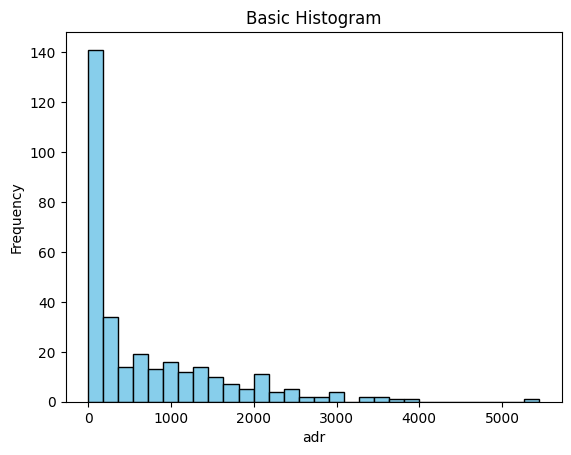

In [129]:
# Plotting a basic histogram
plt.hist(hist_check, bins=30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('adr')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

# Data transformation to dis-aggregate dates- 
# For City Hotel room type A

In [29]:
ca_data_to_transform = ca[['hotel','room_type','arrival_date','total_rns','adr']]
ca_data_to_transform.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32232 entries, 2757 to 109679
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotel         32232 non-null  object 
 1   room_type     32232 non-null  object 
 2   arrival_date  32232 non-null  object 
 3   total_rns     32232 non-null  int8   
 4   adr           32232 non-null  float64
dtypes: float64(1), int8(1), object(3)
memory usage: 1.3+ MB


In [67]:
# Create a new dataframe to store the data by stay date
ca_expanded_df = pd.DataFrame()

In [68]:
# Iterate over each row in the expected arrival date
##Need to convert with hotel, room type columns
for _, row in ca_data_to_transform.iterrows():
    # Get the number of stay dates for the current booking
    num_stay_dates = row['total_rns']
    
    #Create a row for each stay date
    ca_expanded_booking = pd.DataFrame({
        'hotel': row['hotel'],
        'room_type' : row ['room_type'], 
        'arrival_date': pd.date_range(start=row['arrival_date'], periods=num_stay_dates),
        'total_rns': 1,
        'adr': row['adr'] 
    })
    # Append the stay date information to the new dataframe
    ca_expanded_df = pd.concat([ca_expanded_df, ca_expanded_booking], ignore_index=True)  

In [72]:
ca_expanded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93775 entries, 0 to 93774
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   hotel         93775 non-null  object        
 1   room_type     93775 non-null  object        
 2   arrival_date  93775 non-null  datetime64[ns]
 3   total_rns     93775 non-null  int64         
 4   adr           93775 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.6+ MB


In [73]:
ca_expanded_df.head(10)

,hotel,room_type,arrival_date,total_rns,adr
0,City Hotel,A,2021-07-01,1,80.0
1,City Hotel,A,2021-07-02,1,80.0
2,City Hotel,A,2021-07-01,1,101.5
3,City Hotel,A,2021-07-02,1,101.5
4,City Hotel,A,2021-07-01,1,101.5
5,City Hotel,A,2021-07-02,1,101.5
6,City Hotel,A,2021-07-01,1,101.5
7,City Hotel,A,2021-07-02,1,101.5
8,City Hotel,A,2021-07-01,1,101.5
9,City Hotel,A,2021-07-02,1,101.5


In [76]:
# Sort the final dataframe by date
ca_expanded_df = ca_expanded_df.sort_values('arrival_date')
ca_expanded_df = ca_expanded_df.reset_index(drop=True)
ca_expanded_df

,hotel,room_type,arrival_date,total_rns,adr
0,City Hotel,A,2021-07-01,1,80.0
1,City Hotel,A,2021-07-01,1,102.0
2,City Hotel,A,2021-07-01,1,102.0
3,City Hotel,A,2021-07-01,1,102.0
4,City Hotel,A,2021-07-01,1,102.0
...,...,...,...,...,...
93770,City Hotel,A,2023-09-05,1,104.0
93771,City Hotel,A,2023-09-05,1,96.0
93772,City Hotel,A,2023-09-05,1,88.0
93773,City Hotel,A,2023-09-06,1,151.0


In [78]:
ca_expanded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93775 entries, 0 to 93774
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   hotel         93775 non-null  object        
 1   room_type     93775 non-null  object        
 2   arrival_date  93775 non-null  datetime64[ns]
 3   total_rns     93775 non-null  int64         
 4   adr           93775 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.6+ MB
